In [1]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


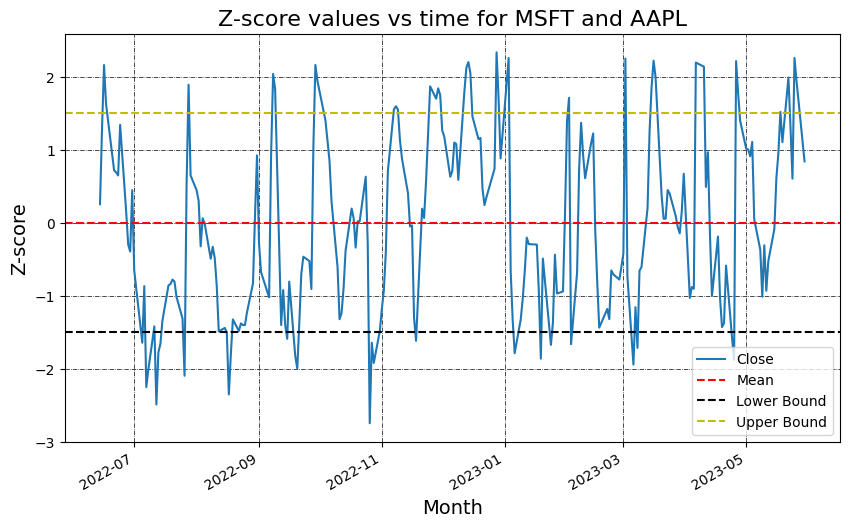

In [2]:

# For AAPL and MSFT
aapl = yf.download('aapl', start="2022-06-01", end="2023-05-31")['Close']
msft = yf.download('msft', start="2022-06-01", end="2023-05-31")['Close']
ratio1 = msft / aapl

# Calculate rolling mean
rolling_mean = ratio1.rolling(window=10).mean()

# Calculate rolling standard deviation
rolling_std = ratio1.rolling(window=10).std()

# Calculate zplot using rolling mean and rolling standard deviation
zplot = (ratio1 - rolling_mean) / rolling_std

# Plotting zplot values against time
plt.figure(figsize=(10, 6))
zplot.plot()

# Calculate upper and lower bounds
lower_bound = -1.5
upper_bound = 1.5

# Plot the lines
plt.axhline(0, color='r', linestyle='--', label='Mean')
plt.axhline(lower_bound, color='k', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='y', linestyle='--', label='Upper Bound')

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Z-score values vs time for MSFT and AAPL", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Z-score', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [5]:
msft_position = None
aapl_position = None

# Define profit and trailing stop loss percentages
profit_percentage = 0.02
trailing_stop_loss_percentage = 0.005

# Define starting capital
starting_capital = 2500000

# Initialize total_profit_loss
total_profit_loss = 0

# Iterate over zplot values
for date, zscore in zplot.items():
    if zscore > upper_bound:
        # Open short position in MSFT and long position in AAPL
        if msft_position is None and aapl_position is None:
            msft_entry_price = msft[date]
            aapl_entry_price = aapl[date]
            entry_date = date
            msft_position = {'entry_price': msft_entry_price, 'entry_date': entry_date}
            aapl_position = {'entry_price': aapl_entry_price, 'entry_date': entry_date}

    elif zscore < lower_bound:
        # Open short position in AAPL and long position in MSFT
        if msft_position is None and aapl_position is None:
            aapl_entry_price = aapl[date]
            msft_entry_price = msft[date]
            entry_date = date
            aapl_position = {'entry_price': aapl_entry_price, 'entry_date': entry_date}
            msft_position = {'entry_price': msft_entry_price, 'entry_date': entry_date}

    # Check profit and trailing stop loss for open positions
    if aapl_position is not None:
        current_aapl_price = aapl[date]
        if current_aapl_price >= aapl_position['entry_price'] * (1 + profit_percentage):
            closing_price = current_aapl_price
            closing_date = date
            reason = 'Profit target reached'
            profit_loss = (closing_price - aapl_position['entry_price']) / aapl_position['entry_price']
            position_size = starting_capital
            position_profit_loss = position_size * profit_loss
            total_profit_loss += position_profit_loss
            print(f"AAPL Long Position Closed - Entry Price: {aapl_position['entry_price']:.2f}, Entry Date: {aapl_position['entry_date']}, Closing Price: {closing_price:.2f}, Closing Date: {closing_date}, Reason: {reason}, Profit/Loss: {position_profit_loss:.2f}", total_profit_loss)
            aapl_position = None
        else:
            trailing_stop_loss = aapl_position['entry_price'] * trailing_stop_loss_percentage
            if current_aapl_price <= aapl_position['entry_price'] - trailing_stop_loss:
                closing_price = current_aapl_price
                closing_date = date
                reason = 'Trailing stop loss reached'
                profit_loss = (closing_price - aapl_position['entry_price']) / aapl_position['entry_price']
                position_size = starting_capital
                position_profit_loss = position_size * profit_loss
                total_profit_loss += position_profit_loss
                print(f"AAPL Long Position Closed - Entry Price: {aapl_position['entry_price']:.2f}, Entry Date: {aapl_position['entry_date']}, Closing Price: {closing_price:.2f}, Closing Date: {closing_date}, Reason: {reason}, Profit/Loss: {position_profit_loss:.2f}")
                aapl_position = None

    if msft_position is not None:
        current_msft_price = msft[date]
        if current_msft_price >= msft_position['entry_price'] * (1 + profit_percentage):
            closing_price = current_msft_price
            closing_date = date
            reason = 'Profit target reached'
            profit_loss = (closing_price - msft_position['entry_price']) / msft_position['entry_price']
            position_size = starting_capital
            position_profit_loss = position_size * profit_loss
            total_profit_loss += position_profit_loss
            print(f"MSFT Short Position Closed - Entry Price: {msft_position['entry_price']:.2f}, Entry Date: {msft_position['entry_date']}, Closing Price: {closing_price:.2f}, Closing Date: {closing_date}, Reason: {reason}, Profit/Loss: {position_profit_loss:.2f}")
            msft_position = None
        else:
            trailing_stop_loss = msft_position['entry_price'] * trailing_stop_loss_percentage
            if current_msft_price <= msft_position['entry_price'] - trailing_stop_loss:
                closing_price = current_msft_price
                closing_date = date
                reason = 'Trailing stop loss reached'
                profit_loss = (closing_price - msft_position['entry_price']) / msft_position['entry_price']
                position_size = starting_capital
                position_profit_loss = position_size * profit_loss
                total_profit_loss += position_profit_loss
                print(f"MSFT Short Position Closed - Entry Price: {msft_position['entry_price']:.2f}, Entry Date: {msft_position['entry_date']}, Closing Price: {closing_price:.2f}, Closing Date: {closing_date}, Reason: {reason}, Profit/Loss: {position_profit_loss:.2f}")

                msft_position = None

print(f"Total Profit/Loss: {total_profit_loss:.2f}") 
print("Profit percentage:", total_profit_loss / 5000000 * 100)


AAPL Long Position Closed - Entry Price: 130.06, Entry Date: 2022-06-16 00:00:00, Closing Price: 135.87, Closing Date: 2022-06-21 00:00:00, Reason: Profit target reached, Profit/Loss: 111679.18 111679.18014100126
MSFT Short Position Closed - Entry Price: 244.97, Entry Date: 2022-06-16 00:00:00, Closing Price: 253.74, Closing Date: 2022-06-21 00:00:00, Reason: Profit target reached, Profit/Loss: 89500.80
AAPL Long Position Closed - Entry Price: 141.56, Entry Date: 2022-07-05 00:00:00, Closing Price: 146.35, Closing Date: 2022-07-07 00:00:00, Reason: Profit target reached, Profit/Loss: 84593.26 285773.2362537052
MSFT Short Position Closed - Entry Price: 262.85, Entry Date: 2022-07-05 00:00:00, Closing Price: 268.40, Closing Date: 2022-07-07 00:00:00, Reason: Profit target reached, Profit/Loss: 52786.64
AAPL Long Position Closed - Entry Price: 147.04, Entry Date: 2022-07-08 00:00:00, Closing Price: 144.87, Closing Date: 2022-07-11 00:00:00, Reason: Trailing stop loss reached, Profit/Loss: